### Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Preparing the Data

In [61]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
val_df = pd.read_csv('data/validate.csv')

The token pattern paramenter of the two vectorizers appeared to have issues with the Bengali script. After trying a few different patterns, I found the one below to function the best.

In [62]:
X_train = [re.sub(r'[^\w\s]', '', text.lower()) for text in train_df['text']]
y_train = train_df['label']

X_test = [re.sub(r'[^\w\s]', '', text.lower()) for text in test_df['text']]
y_test = test_df['label']

X_val = [re.sub(r'[^\w\s]', '', text.lower()) for text in val_df['text']]
y_val = val_df['label']

### Creating Count and TFIDF Vectors

I will be comparing the metrics of both the Count and TFIDF Vectorizers when inputed into a Logistic Regression model.

In [63]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_val = count_vectorizer.transform(X_val)
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

### Logistic Regression using Count Vectorizer

Validation score: 0.68
              precision    recall  f1-score   support

Geopolitical       0.67      0.61      0.64       135
     Neutral       0.70      0.80      0.75       402
    Personal       0.56      0.57      0.57       276
   Political       0.46      0.18      0.26        34
   Religious       0.79      0.36      0.49        53

    accuracy                           0.65       900
   macro avg       0.64      0.50      0.54       900
weighted avg       0.65      0.65      0.64       900



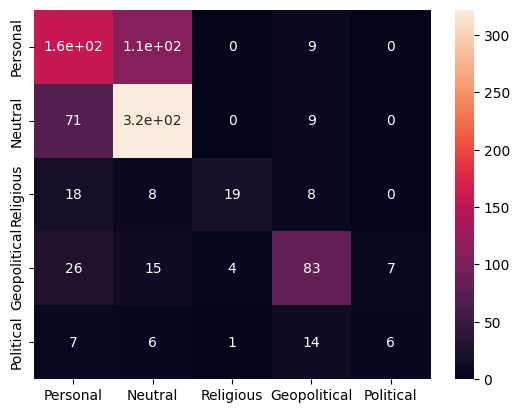

In [64]:
count_log_reg = LogisticRegression()
count_log_reg.fit(count_train, y_train)

valid_score = count_log_reg.score(count_val, y_val)

predictions = count_log_reg.predict(count_test)
f1_micro = metrics.f1_score(y_test, predictions, average='micro')
f1_macro = metrics.f1_score(y_test, predictions, average='macro')
f1_weighted = metrics.f1_score(y_test, predictions, average='weighted')
cf_matrix = metrics.confusion_matrix(y_test, predictions, labels=y_test.unique())

sns.heatmap(cf_matrix, annot=True, xticklabels=y_test.unique(), yticklabels=y_test.unique())
print("Validation score: %0.2f" % valid_score)
# print("F1 score (micro): %0.2f \nF1 score (macro): %0.2f \nF1 score (weighted): %0.2f" 
#       % (f1_micro, f1_macro, f1_weighted))

report = metrics.classification_report(y_test, predictions)
print(report)

### Logistic Regression using TFIDF Vectorizer

Validation score: 0.67
              precision    recall  f1-score   support

Geopolitical       0.72      0.50      0.59       135
     Neutral       0.66      0.86      0.75       402
    Personal       0.56      0.54      0.55       276
   Political       1.00      0.03      0.06        34
   Religious       0.80      0.15      0.25        53

    accuracy                           0.64       900
   macro avg       0.75      0.42      0.44       900
weighted avg       0.66      0.64      0.61       900



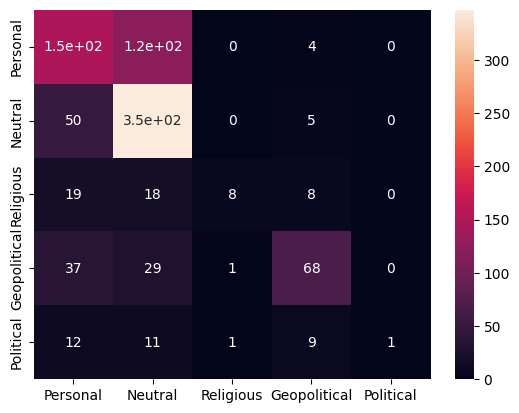

In [65]:
tfidf_log_reg = LogisticRegression()
tfidf_log_reg.fit(tfidf_train, y_train)

valid_score = tfidf_log_reg.score(tfidf_val, y_val)

predictions = tfidf_log_reg.predict(tfidf_test)
accuracy = metrics.accuracy_score(y_test, predictions)
f1_micro = metrics.f1_score(y_test, predictions, average='micro')
f1_macro = metrics.f1_score(y_test, predictions, average='macro')
f1_weighted = metrics.f1_score(y_test, predictions, average='weighted')
cf_matrix = metrics.confusion_matrix(y_test, predictions, labels=y_test.unique())

sns.heatmap(cf_matrix, annot=True, xticklabels=y_test.unique(), yticklabels=y_test.unique())
print("Validation score: %0.2f" % valid_score)
# print("Accuracy score: %.2f \nF1 score (micro): %0.2f \nF1 score (macro): %0.2f \nF1 score (weighted): %0.2f" 
#       % (accuracy, f1_micro, f1_macro, f1_weighted))

multi_cmat = metrics.multilabel_confusion_matrix(y_test, predictions)
report = metrics.classification_report(y_test, predictions)
print(report)

### Getting Most Informative Features

In [66]:
count_feature_names = count_vectorizer.get_feature_names_out()
count_feature_importance = count_log_reg.coef_

for class_idx, class_label in enumerate(count_log_reg.classes_):
    class_importance_scores = count_feature_importance[class_idx]
    top_feature_idx = np.argsort(class_importance_scores)[-3:]
    top_feature_names = [count_feature_names[idx] for idx in top_feature_idx]
    print(class_label, top_feature_names)

Geopolitical ['আওয়মলগর', 'ভরতর', 'ভরত']
Neutral ['ভলবস', 'যখন', 'মনশন']
Personal ['দধ', 'দহনর', 'দহন']
Political ['আওয়মলগ', 'রজকরর', 'রজকর']
Religious ['মসজদ', 'ধরম', 'ইসলম']


In [59]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_feature_importance = tfidf_log_reg.coef_

for class_idx, class_label in enumerate(tfidf_log_reg.classes_):
    class_importance_scores = tfidf_feature_importance[class_idx]
    top_feature_idx = np.argsort(class_importance_scores)[-3:]
    top_feature_names = [tfidf_feature_names[idx] for idx in top_feature_idx]
    print(class_label, top_feature_names)

Geopolitical ['ভরতর', 'বলদশ', 'ভরত']
Neutral ['আম', 'পর', 'যখন']
Personal ['দহনর', 'মর', 'দহন']
Political ['রজকরর', 'রজকর', 'শখ']
Religious ['মসজদ', 'ধরম', 'ইসলম']
